In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.fftpack import fft,ifft
from schrodinger import Schrodinger
import matplotlib.pyplot as plt
import scipy
import sympy as sp

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('poster', font_scale=0.9,  rc={"lines.linewidth": 5})

In [8]:
@np.vectorize
def xt(t,xmax=1,w=0.5):
    return xmax*np.cos(w*t)

def vt(t,xmax=1,w=0.5):
    
    return -w*xmax*np.sin(w*t)


In [6]:
#define x grid:
t = np.linspace(0,30,500)

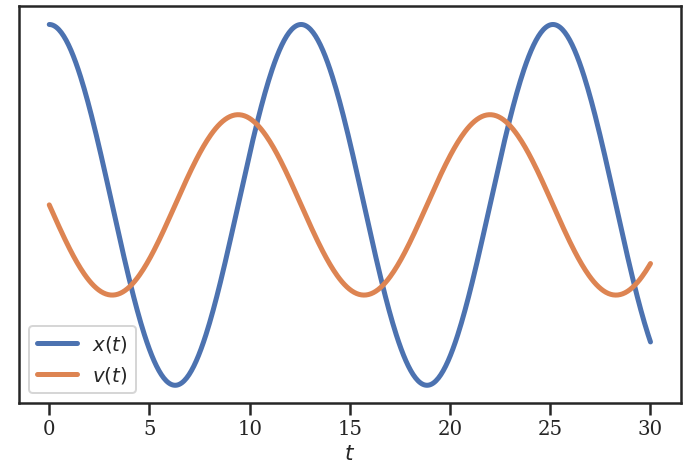

In [11]:
fig = plt.figure(figsize=(10,7))

plt.plot(t,xt(t),label=r'$x(t)$')
plt.plot(t,vt(t),label=r'$v(t)$')
plt.xlabel(r'$t$')
plt.yticks([])
# plt.xticks([])
plt.tight_layout()
plt.legend()
plt.savefig('classicalOsc.png')
plt.show()

### Animation

In [23]:
tmin, tmax = 0,100 #Tempo inicial e final
dt = 0.5 #Intervalo de tempo
npts = 1000 #Numero de pontos
tpts = np.linspace(tmin,tmax,npts)
xmax = xt(tpts).max()
xmin = xt(tpts).min()
xF = xt

In [27]:
fig = plt.figure(figsize=(22,7))
ax1 = plt.subplot(121)
pt, = ax1.plot([0.,xF(tmin)],'o',markersize=25)
line, = ax1.plot([0.,xF(tmin)],[0.,0.],'--')
ax1.set_xlim(1.05*xmin,1.05*xmax)
ax1.set_ylim(-0.1,0.1)
ax1.set_yticks([])
ax1.set_xticks([])
ax1.axis("off")

ax2 = plt.subplot(122)
Kl, = ax2.plot(tpts,xF(tpts),linewidth=4.0)
xlabel = ax2.set_xlabel('t (s)',fontsize=40)
ax2.legend(['x'],loc='upper right',framealpha=1.0,fontsize=25.0)
ax2.set_yticks([])
ax2.set_xticks([])


# Animate plot
def init():
    tpts = [tmin]
    pt.set_data([[0.],xF(tmin)])
    line.set_data([0.,xF(tmin)],[0.,0.])
    line._linewidth = 3.0
    Kl.set_data(tpts,xF(tpts))
    return (pt,line,Kl)

def animate(i):
    
    tA = tmin+i*dt
    tpts = np.linspace(tmin,tA,100)
    xpt = [xF(tA)]
    ypt = [0.]
    pt.set_data(xpt,ypt)
    line.set_data([0.,xF(tA)],[0.,0.])
    line._linewidth = 3.0/(0.1+abs(xF(tA))/2.)
    Kl.set_data(tpts,xF(tpts))
    return (pt,line,Kl)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int((tmax-tmin)/dt), interval=50, 
                               blit=True)

#Para salvar corretamente, tem que descomentar a linha de baixo
anim.save('classicalOsc.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

plt.close()
anim